In [ ]:
import pandas as pd



In [ ]:
import gdown

In [ ]:
import requests

# Define the endpoint and parameters
url = "https://content.guardianapis.com/search"
params = {
    'q': 'Apple stocks',
    'api-key': '04a3b2c5-218d-4200-9ba6-a2d988a6a406',
    'page-size': 200
}

# Make the request to the Guardian API
response = requests.get(url, params=params)
response_json = response.json()

# Print the response JSON
print(response_json)


{'response': {'status': 'ok', 'userTier': 'developer', 'total': 65926, 'startIndex': 1, 'pageSize': 200, 'currentPage': 1, 'pages': 330, 'orderBy': 'relevance', 'results': [{'id': 'technology/article/2024/jun/10/apple-ai-product-launch', 'type': 'article', 'sectionId': 'technology', 'sectionName': 'Technology', 'webPublicationDate': '2024-06-10T22:58:46Z', 'webTitle': 'Apple brings ChatGPT to Siri as it debuts ‘Apple Intelligence’ at WWDC 2024', 'webUrl': 'https://www.theguardian.com/technology/article/2024/jun/10/apple-ai-product-launch', 'apiUrl': 'https://content.guardianapis.com/technology/article/2024/jun/10/apple-ai-product-launch', 'isHosted': False, 'pillarId': 'pillar/news', 'pillarName': 'News'}, {'id': 'business/live/2024/jun/14/tesco-ceo-10m-pay-deal-profits-elon-musk-celebrates-45bn-pay-package-approval-business-live', 'type': 'liveblog', 'sectionId': 'business', 'sectionName': 'Business', 'webPublicationDate': '2024-06-14T15:52:15Z', 'webTitle': 'French bonds and stocks r

In [ ]:
import json
import pandas as pd

# Extract the 'results' list
results = response_json['response']['results']

# Create a DataFrame from the 'results' list
df = pd.DataFrame(results)

# Define the order of the columns
columns = ["id", "type", "sectionId", "sectionName", "webPublicationDate", "webTitle", "webUrl", "apiUrl", "isHosted", "pillarId", "pillarName"]

# Reorder the DataFrame columns
df = df[columns]

# Save the DataFrame to an Excel file
excel_file_path = 'apple_news.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Data has been saved to {excel_file_path}")


Data has been saved to apple_news.xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dp = pd.read_excel('/content/apple_news.xlsx')
dp.head()


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,technology/article/2024/jun/10/apple-ai-produc...,article,technology,Technology,2024-06-10T22:58:46Z,Apple brings ChatGPT to Siri as it debuts ‘App...,https://www.theguardian.com/technology/article...,https://content.guardianapis.com/technology/ar...,False,pillar/news,News
1,business/live/2024/jun/14/tesco-ceo-10m-pay-de...,liveblog,business,Business,2024-06-14T15:52:15Z,French bonds and stocks rocked by political tu...,https://www.theguardian.com/business/live/2024...,https://content.guardianapis.com/business/live...,False,pillar/news,News
2,games/2024/apr/23/apple-arcade-future-alex-rof...,article,games,Games,2024-04-23T13:31:15Z,‘Games are more important to Apple than ever’:...,https://www.theguardian.com/games/2024/apr/23/...,https://content.guardianapis.com/games/2024/ap...,False,pillar/arts,Arts
3,technology/article/2024/may/02/apple-working-t...,article,technology,Technology,2024-05-02T12:18:56Z,Apple working to fix iPhone alarm problem,https://www.theguardian.com/technology/article...,https://content.guardianapis.com/technology/ar...,False,pillar/news,News
4,technology/article/2024/jun/11/apple-push-into...,article,technology,Technology,2024-06-11T16:30:12Z,Apple push into AI could spark smartphone upgr...,https://www.theguardian.com/technology/article...,https://content.guardianapis.com/technology/ar...,False,pillar/news,News


In [ ]:
df.shape
colum_name=['text','sentiment']


In [ ]:
url = 'https://drive.google.com/uc?id=15adYSiUgpIgGZmnUPP2BG76xqUIAXHOO'
output = 'data.csv'
gdown.download(url, output, quiet=False)

colum_name=['text','sentiment']
df = pd.read_csv('data.csv', names=colum_name, encoding='ISO-8859-1')  # Try using a tab delimiter
# If the delimiter is not a tab, try exploring the file to find the correct delimiter
df.head()


Downloading...
From: https://drive.google.com/uc?id=15adYSiUgpIgGZmnUPP2BG76xqUIAXHOO
To: /content/data.csv
100%|██████████| 1.75M/1.75M [00:00<00:00, 35.7MB/s]


,text,sentiment
0,cleaned_tweets,sentiment
1,ndian Railway Finance Corporation Share Price ...,0
2,price lumber lb f sinc hit ytd high maci turna...,0
3,say american dream dead,-1
4,barri silbert extrem optimist bitcoin predict ...,1


In [ ]:
df.isnull().sum()

text         6
sentiment    0
dtype: int64

In [ ]:
df.dropna()

,text,sentiment
0,cleaned_tweets,sentiment
1,ndian Railway Finance Corporation Share Price ...,0
2,price lumber lb f sinc hit ytd high maci turna...,0
3,say american dream dead,-1
4,barri silbert extrem optimist bitcoin predict ...,1
...,...,...
28436,fb c f f cb ecf,0
28437,btc,0
28438,rt hd nuff said tel telcoin telfam crypto bloc...,0
28439,btc,0


In [ ]:
df['sentiment'].value_counts


<bound method IndexOpsMixin.value_counts of 0        sentiment
1                0
2                0
3               -1
4                1
           ...    
28436            0
28437            0
28438            0
28439            0
28440            0
Name: sentiment, Length: 28441, dtype: object>

In [ ]:
port_stem=PorterStemmer()
def stemming(content):
  content=re.sub('[^a-zA-Z]','',str(content))
  content=content.lower()
  content=content.split()
  content=[port_stem.stem(word) for word in content if not stopwords.words('english')]
  content=' '.join(content)
  return content


In [ ]:
df['text'].apply(stemming)




0         
1         
2         
3         
4         
        ..
28436     
28437     
28438     
28439     
28440     
Name: text, Length: 28441, dtype: object

In [ ]:
dp['webTitle'].apply(stemming)

0       
1       
2       
3       
4       
      ..
195     
196     
197     
198     
199     
Name: webTitle, Length: 200, dtype: object

In [ ]:


y=df['sentiment'].values



In [ ]:
df.head()

,text,sentiment
0,cleaned_tweets,sentiment
1,ndian Railway Finance Corporation Share Price ...,0
2,price lumber lb f sinc hit ytd high maci turna...,0
3,say american dream dead,-1
4,barri silbert extrem optimist bitcoin predict ...,1


In [ ]:
df.head()

,text,sentiment
0,"cleaned_tweets,sentiment",NaN
1,ndian Railway Finance Corporation Share Price ...,NaN
2,price lumber lb f sinc hit ytd high maci turna...,NaN
3,"say american dream dead,-1",NaN
4,barri silbert extrem optimist bitcoin predict ...,NaN


In [ ]:
vectorizer=TfidfVectorizer()
x = vectorizer.fit_transform(df['text'].values.astype('U'))

a = vectorizer.transform(dp['webTitle'].values.astype('U'))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
a_pred=rf.predict(a)

In [ ]:
accuracy=accuracy_score(y_test, y_pred)

In [ ]:
print(accuracy)

0.9731059940235542


In [ ]:
y_predc=y_pred.cumsum()

In [ ]:
y_testc=y_test.cumsum()


In [ ]:
y_pred_int = y_pred.astype(int)


In [ ]:
y_predc = y_pred_int.cumsum()



In [ ]:
y_test_int = y_test.astype(int)

y_testc = y_test_int.cumsum()

ValueError: invalid literal for int() with base 10: 'sentiment'

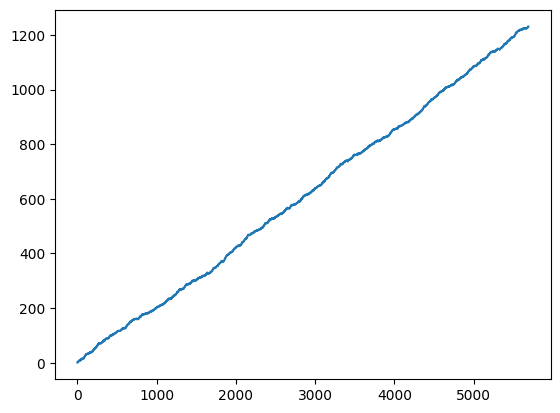

In [ ]:
plt.plot(y_predc)

In [ ]:
a_pred_int = a_pred.astype(int)


In [ ]:
a_predc=a_pred_int.cumsum()

In [ ]:
print(a_predc)

[ 0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  1  1  1  1  2  2  3
  3  3  3  3  3  2  3  3  3  3  4  5  5  5  5  5  5  6  7  8  7  7  7  7
  7  7  7  8  8  8  8  8  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  8  8  9  9  9  8  9  8  8  8  8  9  9  8  8  8  8  8  8  9  9  9 10 10
 11 11 12 12 12 13 13 13 14 14 15 16 16 15 15 15 16 16 16 16 16 16 17 17
 18 18 19 20 20 20 20 20 20 20 20 21 21 21 21 21 20 20 20 20 20 20 20 20
 21 20 20 21 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 24 24 24 24
 24 24 24 24 24 24 24 24]


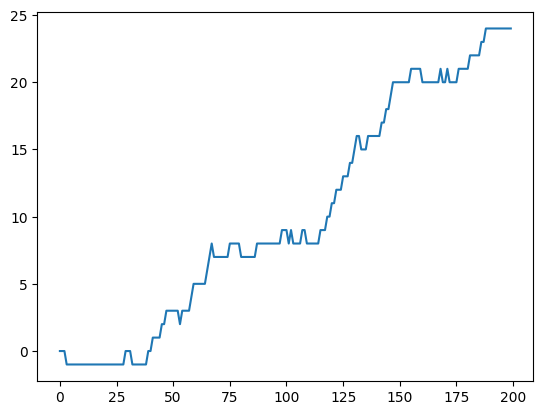

In [ ]:
plt.plot(a_predc)